In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [77]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Files\Data Science\Assignments\Case study on Unsupervised Learning\Wine_clust .csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [78]:
X2 = df.copy()

In [79]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [80]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X2_scaled)

In [81]:
X2_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [82]:
X2_pca

,PC1,PC2,PC3,PC4,PC5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


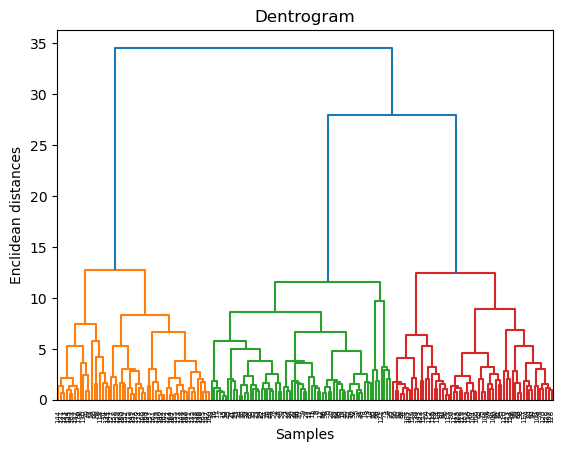

In [83]:
dendrogram = sch.dendrogram(sch.linkage(X2_pca,method='ward'))
plt.title('Dentrogram')
plt.xlabel('Samples')
plt.ylabel('Enclidean distances')
plt.show()

In [84]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Try different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

best_linkage = None
best_num_clusters = 0
best_score = -1

for linkage in linkage_methods:
    for num_clusters in range(2, 6):  # Try different numbers of clusters
        agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage)
        cluster_labels = agg_clustering.fit_predict(X2_pca)
        
        if len(set(cluster_labels)) > 1:  # Ensure more than one cluster is formed
            silhouette_avg = silhouette_score(X2_pca, cluster_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_linkage = linkage
                best_num_clusters = num_clusters

print(f"Best Silhouette Score: {best_score} with linkage='{best_linkage}' and num_clusters={best_num_clusters}")

Best Silhouette Score: 0.34679305595565346 with linkage='ward' and num_clusters=3


In [85]:
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = agg_clustering.fit_predict(X2_pca)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [86]:
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2,
       1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [87]:
X2_np=X2_pca.values 

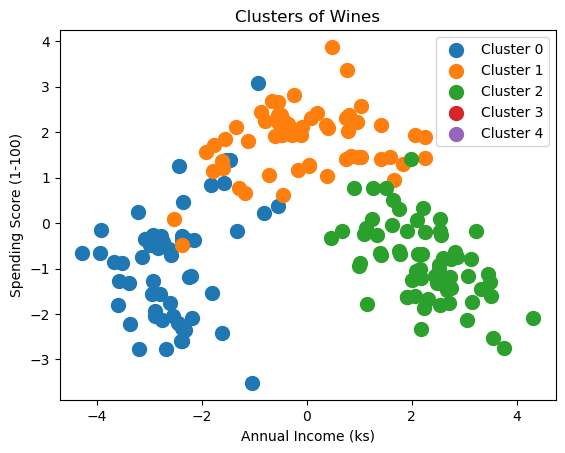

In [88]:
for cluster_label in range(5):
    plt.scatter(X_np[cluster_labels == cluster_label, 0], X_np[cluster_labels == cluster_label, 1], s=100, label=f'Cluster {cluster_label}')
    plt.title('Clusters of Wines')
plt.xlabel('Annual Income (ks)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [66]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X3_scaled)

In [67]:
X3_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [68]:
X3_pca

,PC1,PC2,PC3,PC4,PC5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


In [69]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X3_pca)

In [73]:
X3['Cluster'] = cluster_labels

In [74]:
silhouette_avg = silhouette_score(X3,X3['Cluster'])
silhouette_avg

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)